# Extract elemental and secondary schools from Weekly Patterns.

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from glob import glob

In [2]:
data_dir = r'D:\Data\Advan\Weekly_Patterns\2022'
save_dir = r'D:\Data\Advan\Weekly_Patterns\extracted_elem_sec_schools_6111_2022'
os.makedirs(save_dir, exist_ok=True)

all_files = glob(os.path.join(data_dir, '*.csv.gz'))
all_files.sort()
print(f'Total number of files: {len(all_files)}')
all_files[0], all_files[-1]

Total number of files: 26500


('D:\\Data\\Advan\\Weekly_Patterns\\2022\\2021-12-27--patterns_weekly_000000000000.csv.gz',
 'D:\\Data\\Advan\\Weekly_Patterns\\2022\\2022-12-26--patterns_weekly_000000000499.csv.gz')

In [ ]:
NAICS_code = '6111'
for file in tqdm(all_files):
    df = pd.read_csv(file, compression='gzip', dtype={'poi_cbg': str})
    df_filtered = df[df['naics_code'].astype(str).str.startswith(NAICS_code)]
    if not df_filtered.empty:
        file_name = os.path.basename(file)
        save_path = os.path.join(save_dir, file_name)
        df_filtered.to_csv(save_path, index=False, compression='gzip')

In [ ]:
# merge into a parquet file
all_filtered_files = glob(os.path.join(save_dir, '*.csv.gz'))
all_filtered_files.sort()
print(f'Total number of filtered files: {len(all_filtered_files)}')
print(all_filtered_files[0], all_filtered_files[-1])

df_list = []
for file in tqdm(all_filtered_files):
    df = pd.read_csv(file, compression='gzip', dtype={'poi_cbg': str})
    df_list.append(df)
df_merged = pd.concat(df_list, ignore_index=True)
parquet_save_path = os.path.join(save_dir, 'elementary_secondary_schools_6111_2022.parquet')
df_merged['postal_code'] = df_merged['postal_code'].astype(str) 
df_merged['store_id'] = ""
df_merged['store_id'] = df_merged['store_id'].astype(str) 

df_merged.to_parquet(parquet_save_path, index=False)

In [11]:
df_merged.columns

Index(['placekey', 'parent_placekey', 'safegraph_brand_ids', 'location_name',
       'brands', 'store_id', 'top_category', 'sub_category', 'naics_code',
       'latitude', 'longitude', 'street_address', 'city', 'region',
       'postal_code', 'open_hours', 'category_tags', 'opened_on', 'closed_on',
       'tracking_closed_since', 'websites', 'geometry_type', 'polygon_wkt',
       'polygon_class', 'enclosed', 'phone_number', 'is_synthetic',
       'includes_parking_lot', 'iso_country_code', 'wkt_area_sq_meters',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'visits_by_each_hour', 'poi_cbg',
       'visitor_home_cbgs', 'visitor_home_aggregation', 'visitor_daytime_cbgs',
       'visitor_country_of_origin', 'distance_from_home', 'median_dwell',
       'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_week_brand', 'device_type',
       'normalized_visits_by_state_scaling',
       'normalized_visits_by_regi

In [ ]:
df_merged.groupby(['placekey', 'location_name', 'latitude', 'longitude', 'street_address', 'city', 'region', 'poi_cbg', 'polygon_wkt']).count().reset_index()

,placekey,location_name,latitude,longitude,street_address,city,region,poi_cbg,parent_placekey,safegraph_brand_ids,...,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors
0,222-222@39v-qw5-5s5,Emmonak School,62.775799,-164.524683,General Delivery,Emmonak,AK,021580001001,0,0,...,23,43,37,40,20,43,43,43,43,43
1,222-222@3b5-wsj-5j9,Buckland School,65.977873,-161.124467,9900 University Dr,Buckland,AK,021880001005,0,0,...,37,40,8,11,17,40,40,40,40,40
2,222-222@3bg-qd7-qpv,Ninilchik School,60.043292,-151.675024,15735 Sterling Hwy,Ninilchik,AK,021220008001,0,0,...,53,53,53,53,53,53,53,53,53,53
3,222-222@3bh-25s-zmk,Mcneil Canyon Elementary,59.745733,-151.257733,52188 E End Rd,Fritz Creek,AK,021220011002,0,0,...,38,43,41,43,35,43,43,43,43,43
4,222-222@3bh-2c6-47q,Fireweed Academy,59.652089,-151.506940,995 Soundview Ave,Homer,AK,021220010001,0,0,...,43,48,46,48,39,48,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132635,zzz-223@63j-xb7-g8v,Indianola Informal K 8 School,40.024369,-83.007107,251 E Weber Rd,Columbus,OH,390490005003,0,0,...,53,53,53,53,53,53,53,53,53,53
132636,zzz-223@63r-6s7-w6k,Dayton Oaks,39.242669,-76.982539,4691 Ten Oaks Rd,Dayton,MD,240276051042,0,0,...,53,53,53,53,53,53,53,53,53,53
132637,zzz-223@64h-vju-26k,Sparrow Road Intermediate,36.811682,-76.225022,1605 Sparrow Rd,Chesapeake,VA,515500200031,0,0,...,53,53,53,53,53,53,53,53,53,53
132638,zzz-223@8fc-fc3-8gk,Young Scholars Academy For Excellence,29.752079,-95.372391,1809 Louisiana St,Houston,TX,482011000002,0,0,...,51,53,53,53,53,53,53,53,53,53


In [16]:
group_sizes = (
    df_merged
    .groupby(
        ['placekey', 'location_name', 'latitude', 'longitude',
         'street_address', 'city', 'region', 'poi_cbg', 'polygon_wkt']
    )
    .size()
    .reset_index(name='group_size')
)

group_sizes

,placekey,location_name,latitude,longitude,street_address,city,region,poi_cbg,polygon_wkt,group_size
0,222-222@39v-qw5-5s5,Emmonak School,62.775799,-164.524683,General Delivery,Emmonak,AK,021580001001,POLYGON ((-164.52430582801804 62.7757851999999...,53
1,222-222@3b5-wsj-5j9,Buckland School,65.977873,-161.124467,9900 University Dr,Buckland,AK,021880001005,"POLYGON ((-161.12401581702053 65.9778759, -161...",53
2,222-222@3bg-qd7-qpv,Ninilchik School,60.043292,-151.675024,15735 Sterling Hwy,Ninilchik,AK,021220008001,POLYGON ((-151.67464102196985 60.0432999999999...,53
3,222-222@3bh-25s-zmk,Mcneil Canyon Elementary,59.745733,-151.257733,52188 E End Rd,Fritz Creek,AK,021220011002,"POLYGON ((-151.25738081660626 59.7457491, -151...",53
4,222-222@3bh-2c6-47q,Fireweed Academy,59.652089,-151.506940,995 Soundview Ave,Homer,AK,021220010001,POLYGON ((-151.5059366376662 59.65230308426682...,53
...,...,...,...,...,...,...,...,...,...,...
132635,zzz-223@63j-xb7-g8v,Indianola Informal K 8 School,40.024369,-83.007107,251 E Weber Rd,Columbus,OH,390490005003,POLYGON ((-83.00547877282708 40.02383566138673...,53
132636,zzz-223@63r-6s7-w6k,Dayton Oaks,39.242669,-76.982539,4691 Ten Oaks Rd,Dayton,MD,240276051042,POLYGON ((-76.98451981114033 39.24229964301418...,53
132637,zzz-223@64h-vju-26k,Sparrow Road Intermediate,36.811682,-76.225022,1605 Sparrow Rd,Chesapeake,VA,515500200031,POLYGON ((-76.22319587678822 36.81242769837962...,53
132638,zzz-223@8fc-fc3-8gk,Young Scholars Academy For Excellence,29.752079,-95.372391,1809 Louisiana St,Houston,TX,482011000002,POLYGON ((-95.37216757399995 29.75181870000005...,53


In [17]:
group_sizes.to_csv(r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\elementary_secondary_schools_6111_2022_group_sizes.csv', index=False)

In [ ]:
# save to geoparquet
import geopandas as gpd
gdf_merged_point = gpd.GeoDataFrame(
    group_sizes,
    geometry=gpd.points_from_xy(group_sizes.longitude, group_sizes.latitude),
    crs='EPSG:4326'
)
geoparquet_save_path = os.path.join(save_dir, 'elementary_secondary_schools_6111_2022.geoparquet')
gdf_merged_point.to_parquet(geoparquet_save_path, index=False)

In [20]:
# save to geoparquet as polygons by polygon_wkt column
import geopandas as gpd
geometry = gpd.GeoSeries.from_wkt(group_sizes['polygon_wkt'])
gdf_merged_polygon = gpd.GeoDataFrame(
    group_sizes,
    geometry=geometry,
    crs='EPSG:4326'
)
geoparquet_save_path = os.path.join(save_dir, 'elementary_secondary_schools_6111_2022_polygon.geoparquet')
gdf_merged_polygon.to_parquet(geoparquet_save_path, index=False)

# Extract school daily visits

Observation: 
1. Most high school daily visitation seems stable among semester. Thus, we can identify the recorded device and visit numbers.
2. For the Spring semester, the month of 2, 3, 4, 5 will be used. For the Fall semester, the months of 9, 10, 11, are used. Use the media to avoid events of breaks

In [ ]:
import pandas as pd

In [ ]:
school_enroll_csv = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\highschool_school_placekey.csv"
school_enroll_df = pd.read_csv(school_enroll_csv)

school_enroll_df = school_enroll_df.fillna(0)
school_enroll_df['total_middle_students'] = school_enroll_df['Students_6'] + school_enroll_df['Students_7'] + school_enroll_df['Students_8']
school_enroll_df['total_high_students'] = school_enroll_df['Students_9'] + school_enroll_df['Students_10'] + school_enroll_df['Students_11'] + school_enroll_df['Students_12']
school_enroll_df['total_phone'] =  school_enroll_df['Students_11'] + school_enroll_df['Students_12']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']

# high_school_enroll_df = school_enroll_df.query("total_phone > 100 ").query("total_middle_students < 50 ")
# high_school_enroll_df = high_school_enroll_df.replace([float('inf'), -float('inf')], float('nan'))
high_school_enroll_df = school_enroll_df.replace([float('inf'), -float('inf')], float('nan'))

high_school_enroll_df


C:\tmp\ipykernel_20080\1933882097.py:2: DtypeWarning: Columns (2,13,29,32,33,75,76,77,87,88,89,90,91,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  school_enroll_df = pd.read_csv(school_enroll_csv)


,Nces_Id,School_Level,School_District,School_Name,School_County,Phone,Address,City,State,Zip,School_Type,State_Fips,Low_Grade,High_Grade,Students_Ug,Students_Prek,Students_K,Students_1,Students_2,Students_3,Students_4,Students_5,Students_6,Students_7,Students_8,Students_9,Students_10,Students_11,Students_12,Operational_Status,Latitude,Longitude,State_School_Id,State_District_Id,Total_Male,Total_Female,Total_American_Indian_Alaskan,Total_Asian,Total_Black,Total_Hispanic,Total_White,Free_Lunch_Eligible,Reduce_Price_Lunch_Eligible,Free___Reduced_Lunch_Total,Student_Teacher_Ratio,Full_Time_Equivalent_Teachers,Local_Education_Agency_Id,Local_School_Id,Mailing_Address,Mailing_City,Mailing_State,Mailing_Zip,Union_Identification_Number,Urban_Locale_Code,Ansi_Fips_County_Number,Bureau_Of_Indian,Offered_Ug,Offered_Prek,Offered_K,Offered_1,Offered_2,Offered_3,Offered_4,Offered_5,Offered_6,Offered_7,Offered_8,Offered_9,Offered_10,Offered_11,Offered_12,Title_1_Status,Title_1_Eligible,Title_1_School_Wide,Magnet_School,Charter_School,Shared_Time_School,Virtual_Status,Count_Free_Lunch,Count_Reduced_Lunch,Total_Free___Reduced_Lunch,Total_Pacific,Total_2race,Total_Students,Category,Students_Tk,Students_T1,Coed,Religious_Affiliation,Library,Offered_Tk,Offered_T1,Percent_To_4year_College,Prek_K_T1_Day_Length,Prek_K_T1_Days_Per_Week,Teachers_Full_Time,More_Than_3_4_Time_Teachers,More_Than_1_2_Time_Teachers,More_Than_1_4_Time_Teachers,Less_Than_1_4_Time_Teachers,Total_Teachers,Home_Schooling,Located_In_Home,Has_Religious_Orientation,American_Montessori_Society,Association_Montessori_International,Other_Montessori_associations,Association_Military_Colleges_And_Schools,Association_Waldorf_Schools_of_North_America,National_Association_of_Private_Special_Edu__Centers,Other_Associations_For_Exceptional_Children,European_Council_For_International_Schools,National_Association_For_The_Edu__of_Young_Children,National_Association_of_Laboratory_Schools,National_Coalition_of_Girls_Schools,Other_Special_Emphasis_Associations,Alternative_School_Network,National_Association_of_Independent_Schools,State_or_regional_independent_school_association,National_Coalition_of_Alternative_Community_Schools,National_Independent_Private_Schools_Association,The_Association_of_Boarding_Schools,Other_school_associations,Days_In_School_Year,Hours_In_Day,Minutes_In_Day,Mailing_Zip4,Zip4,NEAR_FID,NEAR_DIST,Placekey,fid,PLACEKEY_1,LOCATION_NAME,TOP_CATEGORY,SUB_CATEGORY,LATITUDE_1,LONGITUDE_1,NAICS_CODE,total_middle_students,total_high_students,total_phone
0,1.000050e+10,Secondary,Albertville City School District,Albertville High School,Marshall County,(256) 894-5000,402 E McCord Ave,Albertville,AL,35950,Regular,1,09,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468.0,470.0,407.0,365.0,Currently open,34.2622,-86.2049,101-0020,101,844,866,6.0,5.0,67,981,600,912.0,79.0,991.0,18.8,91.00,100005.0,1008.0,402 E McCord Ave,Albertville,AL,35950,0.0,0.0,1095,0.0,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,0.0,0.0,0.0,0.0,No,No,No virtual instruction,912.0,79.0,991.0,1.0,50,1710,public,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,290330,0.002168,zzw-222@8gm-ms3-pn5,290330,zzw-222@8gm-ms3-pn5,Albertville High Sch,Elementary and Secondary Schools,Elementary and Secondary Schools,34.263627,-86.206532,611110,0.0,1710.0,862.957447
1,1.000060e+10,Combined or Ungraded,Marshall County School District,Asbury High School,Marshall County,(256) 878-4068,1990 Asbury Rd,Albertville,AL,35951,Regular,1,06,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,96.0,89.0,108.0,95.0,77.0,85.0,Currently open,34.3625,-86.1420,048-0030,48,336,314,2.0,3.0,11,349,281,490.0,53.0,543.0,17.9,36.27,100006.0,1008.0,1990 Asbury Rd,Albertville,AL,35951,0.0,0.0,1095,0.0,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0,0.0,0.0,0.0,No,No,No virtual instruction,490.0,53.0,543.0,0.0,4,650,public,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,

In [ ]:
# monthly_panel_df

In [ ]:
# load the daily visits data
import pandas as pd
from glob import glob

monthly_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\monthly-patterns-normalization-stats"

monthly_panel_df = pd.concat([pd.read_csv(f) for f in glob(monthly_dir + "/*.gz")], ignore_index=True)
monthly_panel_df['date'] = pd.to_datetime(monthly_panel_df['YEAR'].astype(str) + '-' + monthly_panel_df['MONTH'].astype(str) + '-' + monthly_panel_df['DAY'].astype(str))

# load state info
import geopandas as gpd
state_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_state_20m.zip'
state_df = gpd.read_file(state_fname)

county_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_county_20m.zip'
county_gdf = gpd.read_file(county_fname)
county_gdf['county_FIPS'] = county_gdf['STATEFP'] + county_gdf['COUNTYFP']
county_gdf.rename(columns={'NAME':'COUNTY_NAME'}, inplace=True)


monthly_panel_df = monthly_panel_df.merge(state_df[['STATEFP', 'STUSPS', 'NAME']], how='left', left_on='REGION', right_on='STUSPS')
# monthly_panel_df = monthly_panel_df.merge(county_df[['STATEFP', 'COUNTYFP', 'NAME']], how='left', left_on=['REGION', 'REGION2'], right_on=['STUSPS', 'COUNTYFP'])

# monthly_panel_df
county_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,COUNTY_NAME,LSAD,ALAND,AWATER,geometry,county_FIPS
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",29227
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.1794 40.35068, -98.72683 40.3504...",31061
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",36013
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541...",37181
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.4101, -88.81642 36.4107...",47183
...,...,...,...,...,...,...,...,...,...,...,...
3215,40,091,01101836,0500000US40091,40091,McIntosh,06,1601359179,242867678,"POLYGON ((-95.98151 35.28978, -95.98146 35.376...",40091
3216,40,095,01101832,0500000US40095,40095,Marshall,06,962443215,143430766,"POLYGON ((-96.96842 34.17268, -96.9335 34.1727...",40095
3217,48,225,01383898,0500000US48225,48225,Houston,06,3188278910,14435337,"POLYGON ((-95.7287 31.16406, -95.72523 31.2710...",48225
3218,48,407,01383989,0500000US48407,48407,San Jacinto,06,1474332268,151949233,"POLYGON ((-95.32748 30.85955, -95.25238 30.906...",48407


In [ ]:
county_gdf.query(f"county_FIPS == '22001'")

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,COUNTY_NAME,LSAD,ALAND,AWATER,geometry,county_FIPS
183,22,001,00558389,0500000US22001,22001,Acadia,15,1696880727,5918557,"POLYGON ((-92.63199 30.48115, -92.49326 30.480...",22001


In [ ]:
# load the county monthly panel data
county_panel_df = pd.read_csv(r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Neighborhood_patterns\county_monthly_panel.csv", dtype={'county_FIPS': str})
county_panel_df['year_month'] = pd.to_datetime(county_panel_df['year_month'])
county_panel_df

,county_FIPS,year_month,NUMBER_DEVICES_PRIMARY_DAYTIME,NUMBER_DEVICES_RESIDING
0,01001,2018-01-01,8523,11191
1,01001,2018-02-01,7773,10027
2,01001,2018-03-01,8803,11067
3,01001,2018-04-01,7971,9722
4,01001,2018-05-01,9161,9952
...,...,...,...,...
276385,78030,2024-11-01,1270,1012
276386,78030,2024-12-01,1023,708
276387,78030,2025-01-01,1062,747
276388,78030,2025-02-01,1110,727


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

# csv_file = r'/home/hmn5304/Monthly_pattern_starting_2019_education_61.zip' # need 10 min to load

# Note: 
# csv_file = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\high_school_mobility.zip"  # need 1 min to load, seems has missing data
# visits_df = pd.read_csv(csv_file, engine="python", on_bad_lines="skip")   

parquet_fname = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\merged_highschools_2022.parquet'
visits_df = pd.read_parquet(parquet_fname)
 

visits_df.set_index('PLACEKEY', inplace=True)
visits_df['DATE_RANGE_START'] = pd.to_datetime(visits_df['DATE_RANGE_START'])

visits_df = visits_df.query("ISO_COUNTRY_CODE == 'US' ")
print("Total US educational POI records:", len(visits_df.index.unique()))
visits_df

Total US educational POI records: 28602


,BRANDS,BUCKETED_DWELL_TIMES,CATEGORY_TAGS,CITY,CLOSED_ON,DATE_RANGE_END,DATE_RANGE_START,DEVICE_TYPE,DISTANCE_FROM_HOME,ENCLOSED,GEOMETRY_TYPE,INCLUDES_PARKING_LOT,ISO_COUNTRY_CODE,IS_SYNTHETIC,LATITUDE,LOCATION_NAME,LONGITUDE,MEDIAN_DWELL,NAICS_CODE,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_TOTAL_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,OPENED_ON,OPEN_HOURS,PARENT_PLACEKEY,PHONE_NUMBER,POI_CBG,POLYGON_CLASS,POLYGON_WKT,POPULARITY_BY_DAY,POPULARITY_BY_HOUR,POSTAL_CODE,RAW_VISITOR_COUNTS,RAW_VISIT_COUNTS,REGION,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,SAFEGRAPH_BRAND_IDS,STORE_ID,STREET_ADDRESS,SUB_CATEGORY,TOP_CATEGORY,TRACKING_CLOSED_SINCE,VISITOR_COUNTRY_OF_ORIGIN,VISITOR_DAYTIME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_HOME_CBGS,VISITS_BY_DAY,WEBSITES,WKT_AREA_SQ_METERS
PLACEKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
224-223@5vh-b39-qcq,None,"""{ \""<5\"":1, \""5-20\"":0, \""21-60\"":0, \""61-240...",None,Hayward,None,2022-02-01 00:00:00.000,2022-01-01,None,NaN,False,POLYGON,False,US,False,37.661052,Spectrum Schools Mission Valley Campus,-122.057161,NaN,611699,0.000032,0.000030,19.0,0.000001,4.580093e-08,None,None,224-222@5vh-b39-qcq,1.510577e+10,6.001435e+10,SHARED_POLYGON,POLYGON ((-122.05697971599994 37.6610854480000...,"""{\""Monday\"":0,\""Tuesday\"":0,\""Wednesday\"":0,\...","""[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...",94542,1.0,1.0,CA,"""{\""ARCO\"":1,\""Western Union\"":1,\""AutoNation\...","""{\""Alex Brown, a Division of Raymond James\"":...",None,NaN,2021 Highland Blvd,All Other Miscellaneous Schools and Instruction,Other Schools and Instruction,2019-07-01,None,None,None,None,"""[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",spectrumschools.com,1004.0
zzw-222@5vg-3t3-zcq,None,"""{ \""<5\"":6, \""5-20\"":0, \""21-60\"":2, \""61-240...",None,Fairfield,None,2022-02-01 00:00:00.000,2022-01-01,"""{\""ios\"":4}""",20841.0,False,POLYGON,False,US,False,38.252125,Solano Juvenile Detention Facility,-122.063709,21.0,611110,0.000158,0.000144,157.0,0.000009,4.014184e-07,None,None,224-222@5vg-3tq-cqz,NaN,6.095252e+10,OWNED_POLYGON,POLYGON ((-122.06424650899999 38.2522423880000...,"""{\""Monday\"":1,\""Tuesday\"":2,\""Wednesday\"":2,\...","""[0,0,0,0,0,1,0,0,2,2,0,3,0,0,0,1,1,0,0,0,0,0,...",94533,2.0,8.0,CA,"""{\""U-Haul\"":1,\""DHL Distribution\"":1,\""AMBEST...","""{\""AMBEST\"":2,\""U-Haul\"":2,\""Western Union\"":...",None,NaN,740 Beck Ave,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":4}""",None,None,None,"""[0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,...",None,4151.0
zzw-223@5z4-kk4-w6k,None,"""{ \""<5\"":2, \""5-20\"":0, \""21-60\"":1, \""61-240...",None,Colton,None,2022-02-01 00:00:00.000,2022-01-01,"""{\""ios\"":4}""",8336.0,False,POLYGON,False,US,False,34.071673,Washington High,-117.311123,43.0,611110,0.000056,0.000051,57.0,0.000003,1.471695e-07,None,None,None,NaN,6.071007e+10,OWNED_POLYGON,POLYGON ((-117.31103232699996 34.0717262340000...,"""{\""Monday\"":1,\""Tuesday\"":1,\""Wednesday\"":0,\...","""[0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,...",92324,3.0,3.0,CA,"""{\""The Salvation Army\"":1,\""El Pescador\"":1,\...","""{\""Starbucks\"":3,\""Dollar Tree\"":3,\""ARCO\"":3...",None,NaN,900 E C St,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":4}""",None,None,None,"""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...",None,426.0
zzw-222@5pn-ymd-5s5,None,"""{ \""<5\"":1, \""5-20\"":0, \""21-60\"":0, \""61-240...",None,Mayfield,None,2022-02-01 00:00:00.000,2022-01-01,"""{\""ios\"":4}""",33154.0,False,POLYGON,False,US,False,36.714417,Mayfield Youth Development Center,-88.676581,360.0,611110,0.000163,0.000121,134.0,0.000030,1.248307e-06,None,None,222-222@5pn-ymd-389,NaN,2.108302e+11,OWNED_POLYGON,POLYGON ((-88.67677067960673 36.71450800815084...,"""{\""Monday\"":1,\""Tuesday\"":0,\""Wednesday\"":2,\...","""[0,

In [ ]:
visits_df['POI_CBG'] = visits_df['POI_CBG'].str.replace(".0", "").str.zfill(12)

In [ ]:
# placekeys
# visits_df.index.unique().to_list()
placekeys = visits_df.index.unique().to_list()
high_school_enroll_df = high_school_enroll_df[high_school_enroll_df['Placekey'].isin(placekeys)]
high_school_enroll_df
placekeys = high_school_enroll_df['Placekey'].unique() 
placekeys

array(['zzw-222@8gm-ms3-pn5', '222-222@8gm-mzc-rkz',
       'zzy-223@8gm-n94-8jv', ..., '223-223@5py-nkk-hnq',
       '222-224@5qv-x75-7wk', 'zzw-222@8fc-fhq-wkz'],
      shape=(28602,), dtype=object)

In [ ]:
mask = visits_df['LOCATION_NAME'].str.contains("Rayne High School") 
visits_df[mask]

,BRANDS,BUCKETED_DWELL_TIMES,CATEGORY_TAGS,CITY,CLOSED_ON,DATE_RANGE_END,DATE_RANGE_START,DEVICE_TYPE,DISTANCE_FROM_HOME,ENCLOSED,GEOMETRY_TYPE,INCLUDES_PARKING_LOT,ISO_COUNTRY_CODE,IS_SYNTHETIC,LATITUDE,LOCATION_NAME,LONGITUDE,MEDIAN_DWELL,NAICS_CODE,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_TOTAL_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,OPENED_ON,OPEN_HOURS,PARENT_PLACEKEY,PHONE_NUMBER,POI_CBG,POLYGON_CLASS,POLYGON_WKT,POPULARITY_BY_DAY,POPULARITY_BY_HOUR,POSTAL_CODE,RAW_VISITOR_COUNTS,RAW_VISIT_COUNTS,REGION,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,SAFEGRAPH_BRAND_IDS,STORE_ID,STREET_ADDRESS,SUB_CATEGORY,TOP_CATEGORY,TRACKING_CLOSED_SINCE,VISITOR_COUNTRY_OF_ORIGIN,VISITOR_DAYTIME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_HOME_CBGS,VISITS_BY_DAY,WEBSITES,WKT_AREA_SQ_METERS
PLACEKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
zzw-222@8dy-gjq-7nq,None,"""{ \""<5\"":166, \""5-20\"":11, \""21-60\"":42, \""61...",None,Rayne,None,2022-02-01 00:00:00.000,2022-01-01,"""{\""ios\"":66,\""android\"":23}""",3455.0,False,POLYGON,False,US,False,30.247764,Rayne High School,-92.266572,46.0,611110,0.006400,0.005727,5253.0,0.001045,0.000052,None,None,None,1.337334e+10,2.200196e+11,OWNED_POLYGON,POLYGON ((-92.26647196399995 30.24774272200005...,"""{\""Monday\"":57,\""Tuesday\"":54,\""Wednesday\"":5...","""[1,1,1,0,0,0,11,45,58,58,77,55,40,25,38,48,14...",70578,89.0,272.0,LA,"""{\""On The Run Convenience\"":25,\""Western Unio...","""{\""Western Union\"":72,\""Chevron\"":58,\""On The...",None,NaN,1200 N Polk St,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":89}""","""{\""220019606002\"":19,\""220019606003\"":5,\""220...","""{\""22001960600\"":39,\""22001960500\"":14,\""2200...","""{\""220019606003\"":18,\""220019606002\"":9,\""220...","[0,0,1,1,2,12,12,0,0,14,14,16,19,14,2,1,0,16,1...",None,311.0
zzw-222@8dy-gjq-7nq,None,"""{ \""<5\"":208, \""5-20\"":11, \""21-60\"":43, \""61...",None,Rayne,None,2022-03-01 00:00:00.000,2022-02-01,"""{\""ios\"":69,\""android\"":22}""",4435.0,False,POLYGON,False,US,False,30.247764,Rayne High School,-92.266572,82.0,611110,0.007200,0.006433,6540.0,0.001279,0.000059,None,None,None,1.337334e+10,2.200196e+11,OWNED_POLYGON,POLYGON ((-92.26647196399995 30.24774272200005...,"""{\""Monday\"":57,\""Tuesday\"":75,\""Wednesday\"":7...","""[0,0,0,1,1,1,6,52,75,75,98,76,44,40,47,56,8,7...",70578,91.0,340.0,LA,"""{\""Western Union\"":25,\""On The Run Convenienc...","""{\""Western Union\"":74,\""On The Run Convenienc...",None,NaN,1200 N Polk St,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":91}""","""{\""220019606002\"":20,\""220550019011\"":4}""","""{\""22001960600\"":41,\""22001960500\"":11,\""2200...","""{\""220019606003\"":16,\""220019606001\"":10,\""22...","[20,20,14,20,0,0,16,19,19,21,15,0,0,22,19,22,1...",None,311.0
zzw-222@8dy-gjq-7nq,None,"""{ \""<5\"":233, \""5-20\"":14, \""21-60\"":43, \""61...",None,Rayne,None,2022-04-01 00:00:00.000,2022-03-01,"""{\""ios\"":87,\""android\"":23}""",3553.0,False,POLYGON,False,US,False,30.247764,Rayne High School,-92.266572,60.0,611110,0.007072,0.006344,6184.0,0.001191,0.000041,None,None,None,1.337334e+10,2.200196e+11,OWNED_POLYGON,POLYGON ((-92.26647196399995 30.24774272200005...,"""{\""Monday\"":74,\""Tuesday\"":58,\""Wednesday\"":7...","""[0,0,0,0,0,1,5,63,76,76,85,76,59,60,67,65,14,...",70578,110.0,370.0,LA,"""{\""On The Run Convenience\"":27,\""Western Unio...","""{\""Western Union\"":83,\""Chevron\"":77,\""On The...",None,NaN,1200 N Polk St,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":110}""","""{\""220019606002\"":14,\""220019606001\"":4,\""220...","""{\""22001960600\"":42,\""22001960500\"":18,\""2200...","""{\""220019606003\"":15,\""220019606002\"":12,\""22...","[0,0,18,22,0,0,22,20,24,15,19,1,0,0,5,22,27,22...",None,311.0
zzw-222@8dy-gjq-7n

PLACEKEY
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
zzw-222@8gm-ms3-pn5    010950309032
Name: POI_CBG, dtype: object

In [ ]:
import os
import ast
import traceback
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc

save_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\high_school_daily_visit_plots_v2'
os.makedirs(save_dir, exist_ok=True)

visits_df['VISITS_BY_DAY'] = visits_df['VISITS_BY_DAY'].str.replace(r'"', "") 


# placekeys = high_school_enroll_df['Placekey'].unique()#.to_list()
# visits_df.set_index('PLACEKEY', inplace=True)
visits_df = visits_df[visits_df.index.isin(placekeys)]
print("Total US educational POI records:", len(placekeys))


def get_daily_visits(row):    
    visits_by_day = ast.literal_eval(row['VISITS_BY_DAY'])
    # print("visits:", type(visits_by_day), visits_by_day)
    # get the last day of a month (yyyy-mm)
    first_day = pd.to_datetime(row['DATE_RANGE_START']) 
    last_day = first_day + pd.DateOffset(days=len(visits_by_day)) - pd.DateOffset(days=1)
    date_range = pd.date_range(start=first_day, end=last_day, freq='D')
    visits_by_day = pd.DataFrame({'day': date_range, 'visits': visits_by_day})
    visits_by_day['visits'] = visits_by_day['visits'].astype(int)
    visits_by_day['RAW_VISITOR_COUNTS'] = row['RAW_VISITOR_COUNTS']

    # print("visits length:", len(visits_by_day), first_day )

    return visits_by_day

for placekey in tqdm(placekeys[:]):
    # pick a random high school
    # random_school = high_school_enroll_df.query("total_phone > 100 ").sample(n=1)
    # placekey = random_school['Placekey'].values[0]

    try:
        if placekey not in high_school_enroll_df['Placekey'].values:
            print(f"Warning: placekey {placekey} not found in high_school_enroll_df")
            continue

        school_df = visits_df.loc[placekey].copy()
        if school_df.empty:
            continue
        school_df = school_df.dropna(subset=['VISITS_BY_DAY'])
        if len(school_df) == 0:
            continue
        school_df = school_df.dropna(subset=['VISITS_BY_DAY'])
        placename = school_df['LOCATION_NAME'].values[0]
        # print(placename, placekey)
        
        df_list = []
        for index, row in school_df.iterrows():
            daily_visits = get_daily_visits(row)
            df_list.append(daily_visits)

        daily_visits_df = pd.concat(df_list) 
        daily_visits_df['visits'] = daily_visits_df['visits'].astype(int)
        daily_visits_df = daily_visits_df.set_index('day')
        daily_visits_df = daily_visits_df.sort_index()

        # Step 1: Create complete date range
        full_index = pd.date_range(start=daily_visits_df.index.min(), end=daily_visits_df.index.max(), freq='D')

        # Step 2: Reindex to include all days (missing days become NaN)
        daily_visits_df = daily_visits_df.reindex(full_index)

        # Step 3: Convert 0s to NaN so they don’t plot
        fig, ax = plt.subplots(figsize=(24, 6))
        daily_visits_df = daily_visits_df.where(daily_visits_df > -1)

        # monthly_median = daily_visits_df.resample('ME').median()
        # get the 90 percentile for each month
        monthly_median = daily_visits_df.resample('ME').quantile(0.65, interpolation='nearest')

        daily_visits_df['RAW_VISITOR_COUNTS'] = daily_visits_df['RAW_VISITOR_COUNTS']  
        daily_visits_df.plot(ax=ax)
        hs_match = high_school_enroll_df.query(f"Placekey == '{placekey}'")
        if hs_match.empty:
            print(f"Warning: placekey {placekey} not found in high_school_enroll_df")
            continue
        total_phone = hs_match.iloc[0]['total_phone']
        ax.axhline(y=total_phone, color='black', linestyle='--', label='Total people')
        ax.set_title("Daily visits for: " + placename)

    # Step 4: Plot
         
        
        # plot the county panel data
        # county_FIPS = random_school['countyFIPS'].values[0]
        school_visits_df = visits_df.loc[placekey].copy()
        school_visits_df['countyFIPS'] = school_visits_df['POI_CBG'].astype(str).str.zfill(12).str[:5]
        county_FIPS = school_visits_df['countyFIPS'].values[0]
        state_FIPS = county_FIPS[:2]
        # state_FIPS = random_school['stateFIPS'].values[0]

        # get panel data for the county
        school_county_panel_df = county_panel_df.query(f"county_FIPS == '{county_FIPS}' ")
    
        # draw a horizontal line at the median for each month
        for date, row in monthly_median.iterrows():
            # get the first day of the month
            start = date.to_period('M').start_time   # or: start = date.replace(day=1)
            end = date
            ax.hlines(row['visits'], xmin=start, xmax=end,
                    colors='red', linestyles='--', linewidth=1)
            
            # draw monthly panel
            panel_device_count = school_county_panel_df.query(f"year_month >= '{start.date()}' and year_month <= '{end.date()}' ")['NUMBER_DEVICES_RESIDING'].median()
            # print("Monthly panel device count:", start, end, panel_device_count)
            ax.hlines(panel_device_count / 200, xmin=start, xmax=end,
                    colors='green', linestyles='--', linewidth=1)
            
        ax.hlines(row['visits'], xmin=start, xmax=end,
                    colors='red', linestyles='--', linewidth=1, label='School Monthly Weekday Median')
        ax.hlines(panel_device_count / 200, xmin=start, xmax=end,
                    colors='green', linestyles='--', linewidth=1, label='County Monthly Panel Device Count')

        # county_panel_df = county_panel_df.set_index('date')
        limits = ax.get_xlim()
        # draw the state panel data

        state_df = monthly_panel_df[['TOTAL_DEVICES_SEEN', 'date', 'STATEFP']].query(f"STATEFP == '{state_FIPS}'").set_index('date').sort_index()
        state_df['TOTAL_DEVICES_SEEN'] = state_df['TOTAL_DEVICES_SEEN'] / 1000
        state_df['TOTAL_DEVICES_SEEN'].plot(ax=ax, label='State Monthly Panel Device Count')
        ax.set_xlim(limits)

        ax.legend()
        try:
            state_name = monthly_panel_df.query(f"STATEFP == '{state_FIPS}'")['NAME'].values[0]
        except IndexError:
            state_name = ""
            print("State name not found for STATEFP:", state_FIPS)
        
        county_match = county_gdf.query(f"county_FIPS == '{county_FIPS}'")
        if county_match.empty:
            print("County name not found for county_FIPS:", county_FIPS)
            print("POI_CBG:", school_visits_df['POI_CBG'].values[0])
            print("LOCATION_NAME:", placename)
            print("Placekey:", placekey)
            county_name = "Unknown County"
            
        else:
            county_name = county_match.iloc[0]['COUNTY_NAME']

        ax.set_title(f"Daily visits for: {placename} in {county_name}, {state_name}")
        fname = os.path.join(save_dir, f'{state_name}_{county_name}_{county_FIPS}_{placekey}.png')
        plt.savefig(fname)
        plt.close('all')
        del daily_visits_df
        gc.collect()
        # break
    except Exception as e:
        tb = traceback.extract_tb(e.__traceback__)[-1]
        print(f"Error processing placekey: {placekey} @ {tb.filename}:{tb.lineno} – {type(e).__name__}: {e}")
        # print("school_df:\n", school_df)
        continue
    
daily_visits_df.resample('ME').median().dropna()

Total US educational POI records: 28602


  2%|▏         | 686/28602 [23:56<20:32:34,  2.65s/it]

Error processing placekey: 22p-225@8tt-vyd-kzz @ C:\tmp\ipykernel_20080\1032111062.py:48 – TypeError: Series.dropna() got an unexpected keyword argument 'subset'


  3%|▎         | 840/28602 [30:26<23:53:57,  3.10s/it]

Error processing placekey: 23f-222@5zb-xc2-dqf @ C:\tmp\ipykernel_20080\1032111062.py:48 – TypeError: Series.dropna() got an unexpected keyword argument 'subset'


  4%|▎         | 1061/28602 [46:01<25:30:59,  3.34s/it]

In [ ]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
placekey = r'zzw-222@8gm-rp7-8jv'
visits_df.loc[placekey].index

Index(['zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv',
       'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv',
       'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv',
       'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv',
       'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv', 'zzw-222@8gm-rp7-8jv',
       'zzw-222@8gm-rp7-8jv'],
      dtype='object', name='PLACEKEY')

Albertville High Sch zzw-222@8gm-ms3-pn5


,PARENT_PLACEKEY,SAFEGRAPH_BRAND_IDS,LOCATION_NAME,BRANDS,STORE_ID,TOP_CATEGORY,SUB_CATEGORY,NAICS_CODE,LATITUDE,LONGITUDE,STREET_ADDRESS,CITY,REGION,POSTAL_CODE,OPEN_HOURS,CATEGORY_TAGS,OPENED_ON,CLOSED_ON,TRACKING_CLOSED_SINCE,WEBSITES,GEOMETRY_TYPE,POLYGON_WKT,POLYGON_CLASS,ENCLOSED,PHONE_NUMBER,IS_SYNTHETIC,INCLUDES_PARKING_LOT,ISO_COUNTRY_CODE,WKT_AREA_SQ_METERS,DATE_RANGE_START,DATE_RANGE_END,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS,VISITS_BY_DAY,POI_CBG,VISITOR_HOME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_DAYTIME_CBGS,VISITOR_COUNTRY_OF_ORIGIN,DISTANCE_FROM_HOME,MEDIAN_DWELL,BUCKETED_DWELL_TIMES,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,POPULARITY_BY_HOUR,POPULARITY_BY_DAY,DEVICE_TYPE,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,NORMALIZED_VISITS_BY_TOTAL_VISITORS,countyFIPS
PLACEKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
zzw-222@8gm-ms3-pn5,NaN,NaN,Albertville High Sch,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,34.263627,-86.206532,402 E McCord Ave,Albertville,AL,35950,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-86.20680001699998 34.26423172400007...,OWNED_POLYGON,False,NaN,False,False,US,1526,2019-04-01,2019-05-01 00:00:00,75.0,63.0,"[7,1,6,2,3,1,0,2,21,1,2,0,1,1,0,1,3,0,0,0,5,0,...",10950309032,"{""010950309022"":7,""010950308023"":6,""0109503080...","{""01095030902"":15,""01095030802"":8,""01095030801...","{""010950309021"":13,""010950309031"":4,""010499613...","{""US"":63}",3334.0,83.0,"{ ""<5"":52, ""5-20"":3, ""21-60"":4, ""61-240"":15, ""...","{""Western Union"":10,""Suburban Propane"":8,""Walm...","{""Western Union"":58,""Walmart"":52,""Shell Oil"":4...","[1,2,0,1,0,0,1,2,9,9,6,5,4,0,5,12,11,11,7,0,6,...","{""Monday"":11,""Tuesday"":30,""Wednesday"":12,""Thur...","{""ios"":47,""android"":16}",1053.0,0.001345,0.001559,0.000006,0.000204,10950
zzw-222@8gm-ms3-pn5,NaN,NaN,Albertville High Sch,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,34.263627,-86.206532,402 E McCord Ave,Albertville,AL,35950,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-86.20680001699998 34.26423172400007...,OWNED_POLYGON,False,NaN,False,False,US,1526,2019-05-01,2019-06-01 00:00:00,420.0,378.0,"[6,5,2,0,0,4,6,7,5,2,1,1,3,4,2,5,299,25,4,6,2,...",10950309032,"{""010950309022"":30,""010950309032"":25,""01095030...","{""01095030902"":56,""01095030903"":40,""0109503080...","{""010950308013"":14,""010950309022"":10,""01095030...","{""US"":378}",6255.0,94.0,"{ ""<5"":141, ""5-20"":25, ""21-60"":66, ""61-240"":17...","{""Western Union"":115,""Walmart"":78,""Shell Oil"":...","{""Western Union"":368,""Walmart"":355,""Walmart Vi...","[0,1,0,0,1,0,1,1,18,18,10,16,11,7,14,26,41,79,...","{""Monday"":16,""Tuesday"":16,""Wednesday"":20,""Thur...","{""ios"":201,""android"":177}",5835.0,0.007578,0.008891,0.000029,0.001106,10950
zzw-222@8gm-ms3-pn5,NaN,NaN,Albertville High Sch,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,34.263627,-86.206532,402 E McCord Ave,Albertville,AL,35950,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-86.20680001699998 34.26423172400007...,OWNED_POLYGON,False,NaN,False,False,US,1526,2019-06-01,2019-07-01 00:00:00,67.0,43.0,"[2,0,0,0,0,0,0,0,2,1,2,3,0,1,1,3,4,0,1,5,2,17,...",10950309032,"{""010950309032"":6,""010950309022"":5,""0109503080...","{""01095030902"":9,""01095030903"":6,""01095030802""...","{""010950308023"":4,""010950309022"":4}","{""US"":43}",5922.0,20.0,"{ ""<5"":56, ""5-20"":4, ""21-60"":5, ""61-240"":1, "">...","{""Western Union"":17,""Health Mart"":13,""Shell Oi...","{""Western Union"":41,""Walmart"":37,""Walmart Phar...","[0,0,0,1,0,1,1,2,5,5,5,10,5,5,2,4,3,7,7,5,5,1,...","{""Monday"":7,""Tuesday"":6,""Wednesday"":9,""Thursda...","{""ios"":23,""android"":20}",912.0,0.003757,0.004179,0.000005,0.000172,10950
zzw-222@8gm-ms3-pn5,NaN,NaN,Albertville H

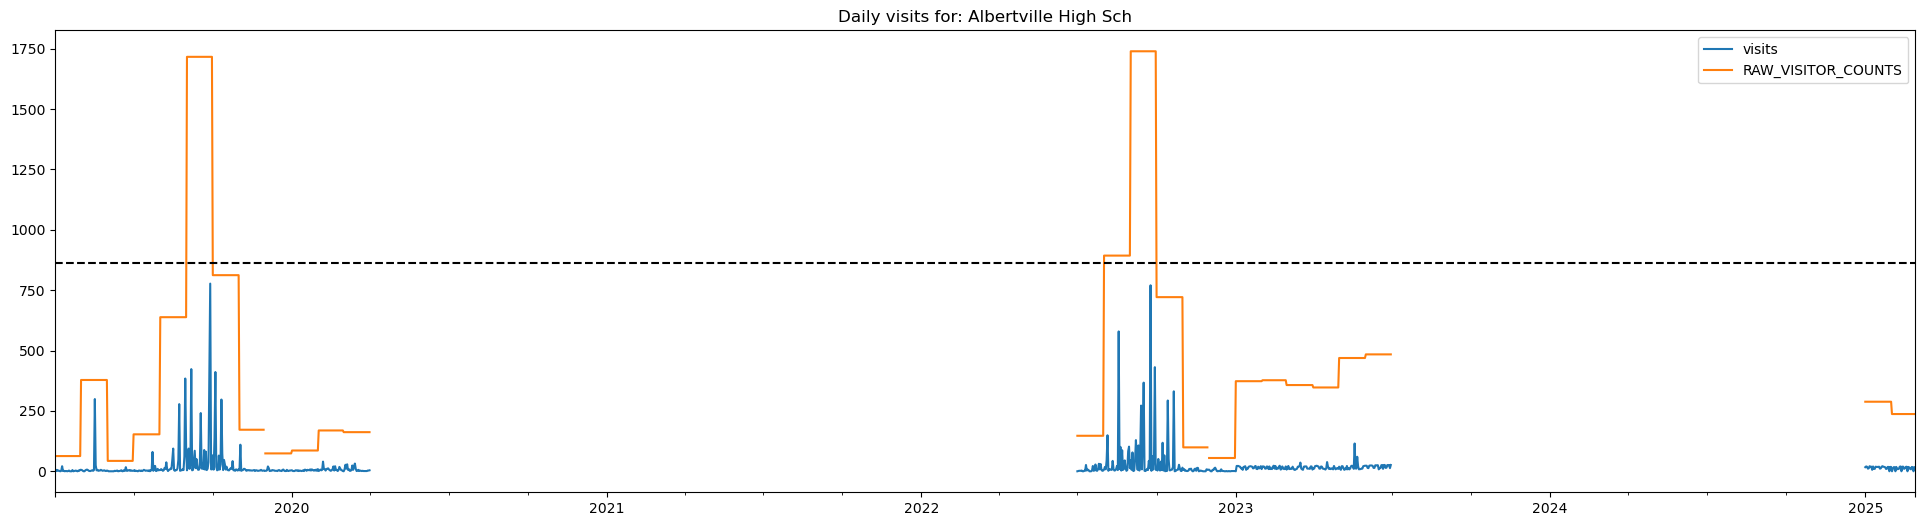

In [ ]:
placekey = 'zzw-222@8gm-ms3-pn5'
school_df = visits_df.loc[placekey].copy()
placename = school_df['LOCATION_NAME'].values[0]
print(placename, placekey)

df_list = []
for index, row in school_df.iterrows():
    daily_visits = get_daily_visits(row)
    df_list.append(daily_visits)

daily_visits_df = pd.concat(df_list) 
daily_visits_df['visits'] = daily_visits_df['visits'].astype(int)
daily_visits_df = daily_visits_df.set_index('day')
daily_visits_df = daily_visits_df.sort_index()

# Step 1: Create complete date range
full_index = pd.date_range(start=daily_visits_df.index.min(), end=daily_visits_df.index.max(), freq='D')

# Step 2: Reindex to include all days (missing days become NaN)
daily_visits_df = daily_visits_df.reindex(full_index)

# Step 3: Convert 0s to NaN so they don’t plot
fig, ax = plt.subplots(figsize=(24, 6))
daily_visits_df = daily_visits_df.where(daily_visits_df > -1)

# monthly_median = daily_visits_df.resample('ME').median()
# get the 90 percentile for each month
monthly_median = daily_visits_df.resample('ME').quantile(0.65, interpolation='nearest')

daily_visits_df['RAW_VISITOR_COUNTS'] = daily_visits_df['RAW_VISITOR_COUNTS']  
daily_visits_df.plot(ax=ax)
total_phone = high_school_enroll_df.query(f"Placekey == '{placekey}'").iloc[0]['total_phone']  
ax.axhline(y=total_phone, color='black', linestyle='--', label='Total people')
ax.set_title("Daily visits for: " + placename)

school_visits_df = visits_df.loc[placekey].copy()
school_visits_df['countyFIPS'] = school_visits_df['POI_CBG'].astype(str).str[:5]
county_FIPS = school_visits_df['countyFIPS'].values[0]
state_FIPS = county_FIPS[:2]
# state_FIPS = random_school['stateFIPS'].values[0]

# get panel data for the county
school_county_panel_df = county_panel_df.query(f"county_FIPS == '{county_FIPS}' ")

school_visits_df

In [ ]:
county_gdf.query(f"county_FIPS == '10030'")

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,COUNTY_NAME,LSAD,ALAND,AWATER,geometry,county_FIPS


In [ ]:
county_FIPS
state_name
county_FIPS
state_FIPS

'10'

<Axes: xlabel='date'>

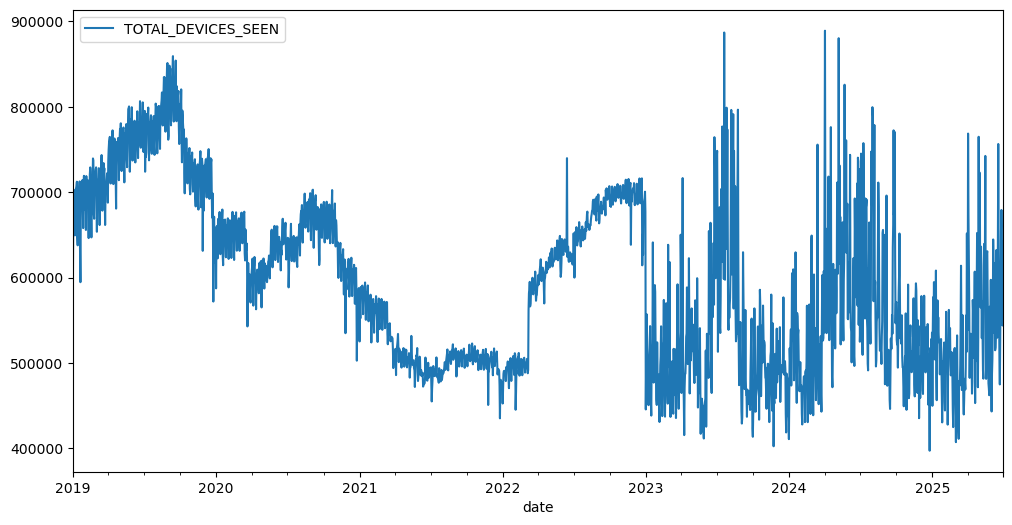

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
monthly_panel_df[['TOTAL_DEVICES_SEEN', 'date', 'STATEFP']].query(f"STATEFP == '{state_FIPS}'").set_index('date').sort_index().plot(ax=ax)

In [ ]:
daily_visits_df

,visits,RAW_VISITOR_COUNTS
2020-04-01,1.0,27.0
2020-04-02,7.0,27.0
2020-04-03,0.0,27.0
2020-04-04,0.0,27.0
2020-04-05,1.0,27.0
...,...,...
2023-07-27,16.0,166.0
2023-07-28,15.0,166.0
2023-07-29,12.0,166.0
2023-07-30,12.0,166.0


In [ ]:
school_county_panel_df
monthly_median
school_visits_df
# school_df
# resample by month


,PARENT_PLACEKEY,SAFEGRAPH_BRAND_IDS,LOCATION_NAME,BRANDS,STORE_ID,TOP_CATEGORY,SUB_CATEGORY,NAICS_CODE,LATITUDE,LONGITUDE,STREET_ADDRESS,CITY,REGION,POSTAL_CODE,OPEN_HOURS,CATEGORY_TAGS,OPENED_ON,CLOSED_ON,TRACKING_CLOSED_SINCE,WEBSITES,GEOMETRY_TYPE,POLYGON_WKT,POLYGON_CLASS,ENCLOSED,PHONE_NUMBER,IS_SYNTHETIC,INCLUDES_PARKING_LOT,ISO_COUNTRY_CODE,WKT_AREA_SQ_METERS,DATE_RANGE_START,DATE_RANGE_END,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS,VISITS_BY_DAY,POI_CBG,VISITOR_HOME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_DAYTIME_CBGS,VISITOR_COUNTRY_OF_ORIGIN,DISTANCE_FROM_HOME,MEDIAN_DWELL,BUCKETED_DWELL_TIMES,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,POPULARITY_BY_HOUR,POPULARITY_BY_DAY,DEVICE_TYPE,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,NORMALIZED_VISITS_BY_TOTAL_VISITORS,countyFIPS
PLACEKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
zzy-222@63v-6sm-y9z,NaN,NaN,Elyria High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.362118,-82.108254,311 6th St,Elyria,OH,44035,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-82.10884035854718 41.36285547160913...,OWNED_POLYGON,False,1.440285e+10,False,False,US,20773,2019-01-01,2019-02-01 00:00:00,2522.0,785.0,"[0,16,148,107,46,34,99,142,118,114,115,152,32,...",390930710001,"{""390930710001"":25,""390930712022"":19,""39093071...","{""39093071000"":42,""39093071202"":35,""3909307060...","{""390930710001"":33,""390852028004"":10,""39103408...","{""US"":783}",8816.0,271.0,"{ ""<5"":326, ""5-20"":56, ""21-60"":178, ""61-240"":7...","{""Western Union"":171,""Altitude Trampoline Park...","{""Western Union"":617,""Walmart"":484,""Walmart Vi...","[8,14,13,10,16,33,78,891,1265,1265,1282,1215,1...","{""Monday"":365,""Tuesday"":419,""Wednesday"":381,""T...","{""android"":406,""ios"":379}",37713.0,0.020527,0.026873,0.000064,0.003530,39093
zzy-222@63v-6sm-y9z,NaN,NaN,Elyria High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.362118,-82.108254,311 6th St,Elyria,OH,44035,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-82.10884035854718 41.36285547160913...,OWNED_POLYGON,False,1.440285e+10,False,False,US,20773,2019-02-01,2019-03-01 00:00:00,2386.0,589.0,"[48,78,7,137,111,109,111,140,21,14,116,109,112...",390930710001,"{""390930710001"":22,""390930712021"":17,""39093071...","{""39093071000"":33,""39093071100"":31,""3909307120...","{""390930710001"":33,""390351301041"":7,""390930714...","{""US"":587}",5302.0,318.0,"{ ""<5"":323, ""5-20"":74, ""21-60"":153, ""61-240"":4...","{""Western Union"":136,""Walmart"":93,""Altitude Tr...","{""Western Union"":444,""Walmart"":334,""Walmart Vi...","[2,0,1,1,0,14,92,1062,1281,1281,1317,1281,1364...","{""Monday"":411,""Tuesday"":444,""Wednesday"":416,""T...","{""android"":321,""ios"":268}",34983.0,0.015627,0.020619,0.000050,0.003256,39093
zzy-222@63v-6sm-y9z,NaN,NaN,Elyria High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.362118,-82.108254,311 6th St,Elyria,OH,44035,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-82.10884035854718 41.36285547160913...,OWNED_POLYGON,False,1.440285e+10,False,False,US,20773,2019-03-01,2019-04-01 00:00:00,3123.0,962.0,"[103,41,9,109,111,122,124,97,6,5,5,136,125,108...",390930710001,"{""390930710001"":27,""390930714001"":19,""39093071...","{""39093071000"":46,""39093070102"":38,""3909307110...","{""390930710001"":37,""390930708001"":8,""390930132...","{""US"":958}",9020.0,287.0,"{ ""<5"":425, ""5-20"":90, ""21-60"":278, ""61-240"":7...","{""Western Union"":209,""Speedway"":131,""Walmart"":...","{""Western Union"":797,""Walmart"":596,""Walmart Vi...","[6,6,5,7,6,16,95,1180,1549,1549,1611,1608,1613...","{""Monday"":566,""Tuesday"":528,""Wednesday"":542,""T...","{""android"":544,""ios"":418}",45045.0,0.024245,0.031328,0.000119,0.004241,39093
zzy-222@63v-6sm-y9

In [ ]:
import ast

random_school = high_school_enroll_df.query("total_phone > 400 ").sample(n=1)
random_school
placekey = random_school['Placekey'].values[0]

school_df = visits_df.loc[placekey].copy()


# show the daily visitation data
# combine all the daily data 

# first_day, last_day

# get the daily data

school_df['VISITS_BY_DAY'] = school_df['VISITS_BY_DAY'].str.replace(r'"', "") 

df_list = []
for index, row in school_df.iterrows():
    daily_visits = get_daily_visits(row)
    df_list.append(daily_visits)

# fig, ax = plt.subplots(figsize=(12, 6))
daily_visits_df = pd.concat(df_list) 
daily_visits_df = daily_visits_df.set_index('day')
# daily_visits_df['visits'] = daily_visits_df['visits'].astype(int)

# do not plot the days has no data
# daily_visits_df = daily_visits_df[(daily_visits_df > 0).any(axis=1)]
# daily_visits_df = daily_visits_df[daily_visits_df > 0]
# daily_visits_df = daily_visits_df.sort_index()

daily_visits_df = daily_visits_df.sort_index()

# Step 1: Create complete date range
full_index = pd.date_range(start=daily_visits_df.index.min(), end=daily_visits_df.index.max(), freq='D')

# Step 2: Reindex to include all days (missing days become NaN)
daily_visits_df = daily_visits_df.reindex(full_index)

# Step 3: Convert 0s to NaN so they don’t plot
daily_visits_df = daily_visits_df.where(daily_visits_df > 0)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(24, 6))
daily_visits_df.plot(ax=ax)
# daily_visits_df
# daily_visits_df.index

total_people = high_school_enroll_df.query(f"Placekey == '{placekey}'").iloc[0]['total_people'] / 10
ax.axhline(y=total_people, color='black', linestyle='--', label='Total people')

## show county high school mobility

In [ ]:
# load the daily visits data
import pandas as pd
from glob import glob

monthly_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\monthly-patterns-normalization-stats"
# weekly_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\weekly-patterns-normalization-stats"

# weekly_panel_df = pd.concat([pd.read_csv(f) for f in glob(weekly_dir + "/*.gz")], ignore_index=True)
# weekly_panel_df
monthly_panel_df = pd.concat([pd.read_csv(f) for f in glob(monthly_dir + "/*.gz")], ignore_index=True)
monthly_panel_df['date'] = pd.to_datetime(monthly_panel_df['YEAR'].astype(str) + '-' + monthly_panel_df['MONTH'].astype(str) + '-' + monthly_panel_df['DAY'].astype(str))

# load state info
import geopandas as gpd
state_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_state_20m.zip'
state_df = gpd.read_file(state_fname)
monthly_panel_df = monthly_panel_df.merge(state_df[['STATEFP', 'STUSPS', 'NAME']], how='left', left_on='REGION', right_on='STUSPS')
# state_df

monthly_panel_df

,DAY,ISO_COUNTRY_CODE,MONTH,REGION,TOTAL_DEVICES_SEEN,TOTAL_HOME_VISITORS,TOTAL_HOME_VISITS,TOTAL_VISITS,YEAR,date,STATEFP,STUSPS,NAME
0,4,US,2,AK,13886,6987,6987,241791,2021,2021-02-04,02,AK,Alaska
1,9,US,2,AK,13799,6922,6922,237558,2021,2021-02-09,02,AK,Alaska
2,26,US,2,AK,14038,6885,6885,277414,2021,2021-02-26,02,AK,Alaska
3,16,US,2,AK,13815,7031,7031,244527,2021,2021-02-16,02,AK,Alaska
4,20,US,2,AK,12989,6493,6493,221783,2021,2021-02-20,02,AK,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140281,6,US,6,WY,38434,21203,21203,216296,2025,2025-06-06,56,WY,Wyoming
140282,25,US,6,WY,40971,22834,22834,215495,2025,2025-06-25,56,WY,Wyoming
140283,1,US,6,WY,38139,22512,22512,150343,2025,2025-06-01,56,WY,Wyoming
140284,11,US,6,WY,42803,24229,24229,201991,2025,2025-06-11,56,WY,Wyoming


In [ ]:
# weekly_panel_df = pd.concat([pd.read_csv(f) for f in glob(weekly_dir + "/*.gz")], ignore_index=True)
# weekly_panel_df
monthly_panel_df = pd.concat([pd.read_csv(f) for f in glob(monthly_dir + "/*.gz")], ignore_index=True)
monthly_panel_df['date'] = pd.to_datetime(monthly_panel_df['YEAR'].astype(str) + '-' + monthly_panel_df['MONTH'].astype(str) + '-' + monthly_panel_df['DAY'].astype(str))

# load state info
import geopandas as gpd
state_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_state_20m.zip'
state_df = gpd.read_file(state_fname)
monthly_panel_df = monthly_panel_df.merge(state_df[['STATEFP', 'STUSPS', 'NAME']], how='left', left_on='REGION', right_on='STUSPS')
# state_df

monthly_panel_df

,DAY,ISO_COUNTRY_CODE,MONTH,REGION,TOTAL_DEVICES_SEEN,TOTAL_HOME_VISITORS,TOTAL_HOME_VISITS,TOTAL_VISITS,YEAR,date,STATEFP,STUSPS,NAME
0,4,US,2,AK,13886,6987,6987,241791,2021,2021-02-04,02,AK,Alaska
1,9,US,2,AK,13799,6922,6922,237558,2021,2021-02-09,02,AK,Alaska
2,26,US,2,AK,14038,6885,6885,277414,2021,2021-02-26,02,AK,Alaska
3,16,US,2,AK,13815,7031,7031,244527,2021,2021-02-16,02,AK,Alaska
4,20,US,2,AK,12989,6493,6493,221783,2021,2021-02-20,02,AK,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140281,6,US,6,WY,38434,21203,21203,216296,2025,2025-06-06,56,WY,Wyoming
140282,25,US,6,WY,40971,22834,22834,215495,2025,2025-06-25,56,WY,Wyoming
140283,1,US,6,WY,38139,22512,22512,150343,2025,2025-06-01,56,WY,Wyoming
140284,11,US,6,WY,42803,24229,24229,201991,2025,2025-06-11,56,WY,Wyoming


In [ ]:

# weekly_panel_df = pd.read_csv(weekly_fname, compression='zip', engine='python', on_bad_lines='skip')

,DAY,ISO_COUNTRY_CODE,MONTH,REGION,TOTAL_DEVICES_SEEN,TOTAL_HOME_VISITORS,TOTAL_HOME_VISITS,TOTAL_VISITS,YEAR
0,4,US,2,AK,13886,6987,6987,241791,2021
1,9,US,2,AK,13799,6922,6922,237558,2021
2,26,US,2,AK,14038,6885,6885,277414,2021
3,16,US,2,AK,13815,7031,7031,244527,2021
4,20,US,2,AK,12989,6493,6493,221783,2021
...,...,...,...,...,...,...,...,...,...
140281,6,US,6,WY,38434,21203,21203,216296,2025
140282,25,US,6,WY,40971,22834,22834,215495,2025
140283,1,US,6,WY,38139,22512,22512,150343,2025
140284,11,US,6,WY,42803,24229,24229,201991,2025


In [ ]:
# join_columns = ['ISO_COUNTRY_CODE', 'REGION', 'YEAR', 'MONTH', 'DAY']
# joined_panel_df = pd.merge(weekly_panel_df, monthly_panel_df, how='inner', left_on=join_columns, 
#                            right_on=join_columns, suffixes=('_weekly', '_monthly'))

# joined_panel_df['diff_device_seen'] = joined_panel_df['TOTAL_DEVICES_SEEN_monthly'] - joined_panel_df['TOTAL_DEVICES_SEEN_weekly']
# joined_panel_df['diff_visits'] = joined_panel_df['TOTAL_VISITS_monthly'] - joined_panel_df['TOTAL_VISITS_weekly']
# joined_panel_df['diff_home_visits'] = joined_panel_df['TOTAL_HOME_VISITS_monthly'] - joined_panel_df['TOTAL_HOME_VISITS_weekly']
# joined_panel_df['diff_home_visitors'] = joined_panel_df['TOTAL_HOME_VISITORS_monthly'] - joined_panel_df['TOTAL_HOME_VISITORS_weekly']

# joined_panel_df

In [ ]:
# joined_panel_df['diff_device_seen'].describe()

In [ ]:
# joined_panel_df.columns

In [ ]:
monthly_panel_df

,DAY,ISO_COUNTRY_CODE,MONTH,REGION,TOTAL_DEVICES_SEEN,TOTAL_HOME_VISITORS,TOTAL_HOME_VISITS,TOTAL_VISITS,YEAR,date,STATEFP,STUSPS,NAME
0,4,US,2,AK,13886,6987,6987,241791,2021,2021-02-01,02,AK,Alaska
1,9,US,2,AK,13799,6922,6922,237558,2021,2021-02-01,02,AK,Alaska
2,26,US,2,AK,14038,6885,6885,277414,2021,2021-02-01,02,AK,Alaska
3,16,US,2,AK,13815,7031,7031,244527,2021,2021-02-01,02,AK,Alaska
4,20,US,2,AK,12989,6493,6493,221783,2021,2021-02-01,02,AK,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140281,6,US,6,WY,38434,21203,21203,216296,2025,2025-06-01,56,WY,Wyoming
140282,25,US,6,WY,40971,22834,22834,215495,2025,2025-06-01,56,WY,Wyoming
140283,1,US,6,WY,38139,22512,22512,150343,2025,2025-06-01,56,WY,Wyoming
140284,11,US,6,WY,42803,24229,24229,201991,2025,2025-06-01,56,WY,Wyoming


In [ ]:
visits_df['county_FIPS'] = visits_df['POI_CBG'].astype(str).replace(".0", "").astype(str).str.zfill(12).str[:5]
visits_df['RAW_VISIT_COUNTS'] = visits_df['RAW_VISIT_COUNTS'].fillna(0).astype(int)
visits_df['RAW_VISITOR_COUNTS'] = visits_df['RAW_VISITOR_COUNTS'].fillna(0).astype(int)

visits_df

,PARENT_PLACEKEY,SAFEGRAPH_BRAND_IDS,LOCATION_NAME,BRANDS,STORE_ID,TOP_CATEGORY,SUB_CATEGORY,NAICS_CODE,LATITUDE,LONGITUDE,STREET_ADDRESS,CITY,REGION,POSTAL_CODE,OPEN_HOURS,CATEGORY_TAGS,OPENED_ON,CLOSED_ON,TRACKING_CLOSED_SINCE,WEBSITES,GEOMETRY_TYPE,POLYGON_WKT,POLYGON_CLASS,ENCLOSED,PHONE_NUMBER,IS_SYNTHETIC,INCLUDES_PARKING_LOT,ISO_COUNTRY_CODE,WKT_AREA_SQ_METERS,DATE_RANGE_START,DATE_RANGE_END,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS,VISITS_BY_DAY,POI_CBG,VISITOR_HOME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_DAYTIME_CBGS,VISITOR_COUNTRY_OF_ORIGIN,DISTANCE_FROM_HOME,MEDIAN_DWELL,BUCKETED_DWELL_TIMES,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,POPULARITY_BY_HOUR,POPULARITY_BY_DAY,DEVICE_TYPE,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,NORMALIZED_VISITS_BY_TOTAL_VISITORS,county_FIPS
PLACEKEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
zzy-222@63v-6sm-y9z,NaN,NaN,Elyria High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.362118,-82.108254,311 6th St,Elyria,OH,44035,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-82.10884035854718 41.36285547160913...,OWNED_POLYGON,False,1.440285e+10,False,False,US,20773,2019-01-01,2019-02-01 00:00:00,2522,785,"[0,16,148,107,46,34,99,142,118,114,115,152,32,...",390930710001,"{""390930710001"":25,""390930712022"":19,""39093071...","{""39093071000"":42,""39093071202"":35,""3909307060...","{""390930710001"":33,""390852028004"":10,""39103408...","{""US"":783}",8816.0,271.0,"{ ""<5"":326, ""5-20"":56, ""21-60"":178, ""61-240"":7...","{""Western Union"":171,""Altitude Trampoline Park...","{""Western Union"":617,""Walmart"":484,""Walmart Vi...","[8,14,13,10,16,33,78,891,1265,1265,1282,1215,1...","{""Monday"":365,""Tuesday"":419,""Wednesday"":381,""T...","{""android"":406,""ios"":379}",37713.0,0.020527,0.026873,0.000064,0.003530,39093
zzy-222@63v-6sm-y9z,NaN,NaN,Elyria High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.362118,-82.108254,311 6th St,Elyria,OH,44035,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-82.10884035854718 41.36285547160913...,OWNED_POLYGON,False,1.440285e+10,False,False,US,20773,2019-02-01,2019-03-01 00:00:00,2386,589,"[48,78,7,137,111,109,111,140,21,14,116,109,112...",390930710001,"{""390930710001"":22,""390930712021"":17,""39093071...","{""39093071000"":33,""39093071100"":31,""3909307120...","{""390930710001"":33,""390351301041"":7,""390930714...","{""US"":587}",5302.0,318.0,"{ ""<5"":323, ""5-20"":74, ""21-60"":153, ""61-240"":4...","{""Western Union"":136,""Walmart"":93,""Altitude Tr...","{""Western Union"":444,""Walmart"":334,""Walmart Vi...","[2,0,1,1,0,14,92,1062,1281,1281,1317,1281,1364...","{""Monday"":411,""Tuesday"":444,""Wednesday"":416,""T...","{""android"":321,""ios"":268}",34983.0,0.015627,0.020619,0.000050,0.003256,39093
zzy-222@63v-6sm-y9z,NaN,NaN,Elyria High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.362118,-82.108254,311 6th St,Elyria,OH,44035,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-82.10884035854718 41.36285547160913...,OWNED_POLYGON,False,1.440285e+10,False,False,US,20773,2019-03-01,2019-04-01 00:00:00,3123,962,"[103,41,9,109,111,122,124,97,6,5,5,136,125,108...",390930710001,"{""390930710001"":27,""390930714001"":19,""39093071...","{""39093071000"":46,""39093070102"":38,""3909307110...","{""390930710001"":37,""390930708001"":8,""390930132...","{""US"":958}",9020.0,287.0,"{ ""<5"":425, ""5-20"":90, ""21-60"":278, ""61-240"":7...","{""Western Union"":209,""Speedway"":131,""Walmart"":...","{""Western Union"":797,""Walmart"":596,""Walmart Vi...","[6,6,5,7,6,16,95,1180,1549,1549,1611,1608,1613...","{""Monday"":566,""Tuesday"":528,""Wednesday"":542,""T...","{""android"":544,""ios"":418}",45045.0,0.024245,0.031328,0.000119,0.004241,39093
zzy-222@63v-6sm-y9z,NaN,NaN,E

In [ ]:
visits_df_agg = visits_df.groupby(["county_FIPS", 'DATE_RANGE_START']).agg({'RAW_VISIT_COUNTS': 'sum', 'RAW_VISITOR_COUNTS': 'sum'}).reset_index().set_index('DATE_RANGE_START')
visits_df_agg

,county_FIPS,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS
DATE_RANGE_START,,,
2019-03-01,01001,517,127
2019-04-01,01001,673,130
2019-05-01,01001,548,138
2019-06-01,01001,51,36
2019-07-01,01001,95,43
...,...,...,...
2021-03-01,78030,0,0
2021-04-01,78030,0,0
2021-05-01,78030,0,0


In [ ]:
# high_school_enroll_df

In [ ]:
high_school_enroll_df['total_people'] = high_school_enroll_df['total_high_students'].fillna(0).astype(int) + high_school_enroll_df['Teachers_Full_Time'].fillna(0).astype(int)
high_school_enroll_df

NameError: name 'high_school_enroll_df' is not defined

In [ ]:
high_school_enroll_df_agg = high_school_enroll_df.merge(visits_df, left_on='Placekey', right_on='PLACEKEY', how='left').drop_duplicates(subset=['Placekey']).groupby("county_FIPS").agg({'total_people': 'sum'})
high_school_enroll_df_agg

,total_people
county_FIPS,
01001,2429
01003,10435
01005,728
01007,848
01009,428
...,...
72147,216
72151,360
72153,1290


<Axes: xlabel='total_people', ylabel='RAW_VISITOR_COUNTS'>

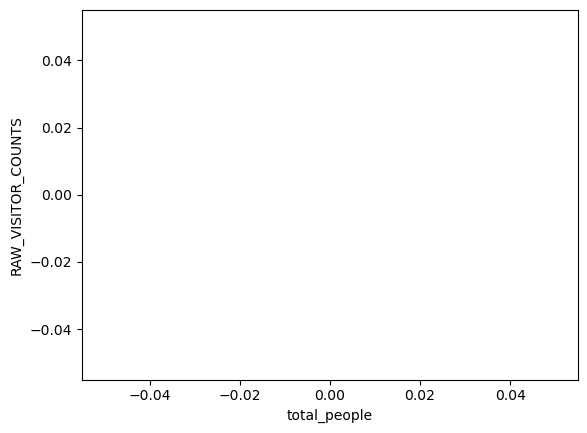

In [ ]:
df = visits_df_agg.merge(high_school_enroll_df_agg, left_index=True, right_index=True, how='left')
df.plot.scatter('total_people', 'RAW_VISITOR_COUNTS')

In [ ]:
# compute the R2
# make the regression model between total_people and RAW_VISITOR_COUNTS
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df.dropna(inplace=True)
X = df[['total_people']]
y = df['RAW_VISITOR_COUNTS']
model.fit(X, y)
r2 = model.score(X, y)
r2

KeyError: "None of [Index(['total_people'], dtype='object')] are in the [columns]"

,county_FIPS,year_month,NUMBER_DEVICES_PRIMARY_DAYTIME,NUMBER_DEVICES_RESIDING
0,01001,2018-01-01,8523,11191
1,01001,2018-02-01,7773,10027
2,01001,2018-03-01,8803,11067
3,01001,2018-04-01,7971,9722
4,01001,2018-05-01,9161,9952
...,...,...,...,...
276385,78030,2024-11-01,1270,1012
276386,78030,2024-12-01,1023,708
276387,78030,2025-01-01,1062,747
276388,78030,2025-02-01,1110,727


<Axes: xlabel='DATE_RANGE_START'>

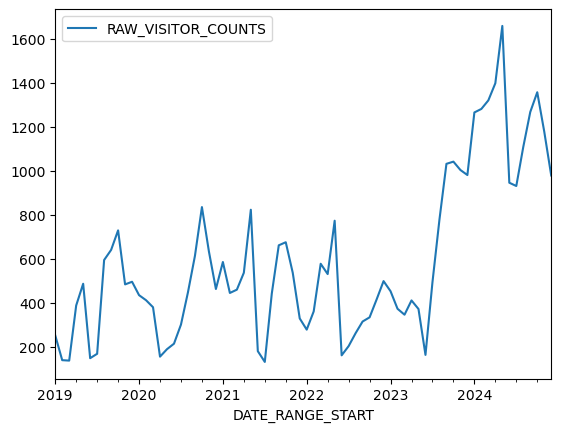

In [ ]:
visits_df_agg.query(f"county_FIPS == '{random_county.values[0]}'").plot(y='RAW_VISITOR_COUNTS' )

In [ ]:
# visits_df_agg

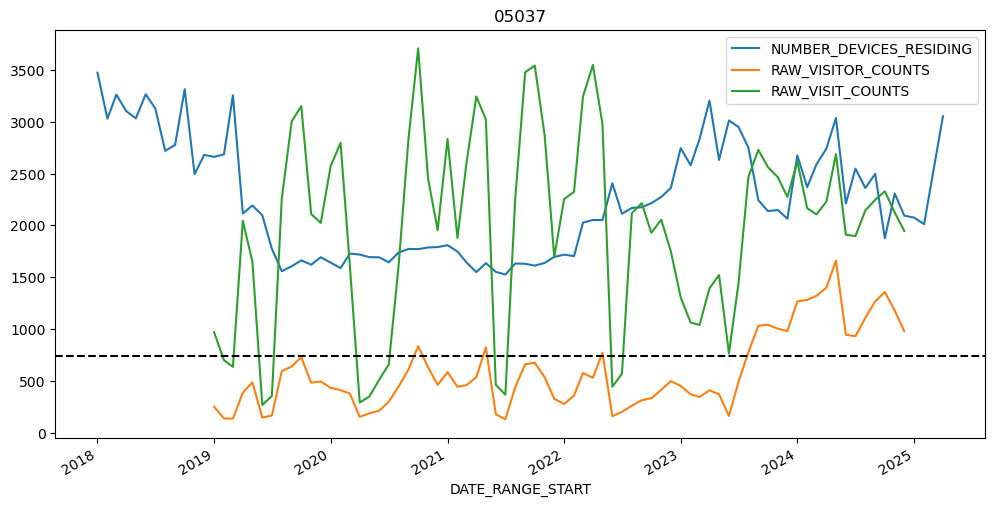

In [ ]:

random_county = county_panel_df.sample(n=1)['county_FIPS']

fig, ax = plt.subplots(figsize=(12, 6))
df = county_panel_df.query(f"county_FIPS == '{random_county.values[0]}'").copy()
df['year_month'] = pd.to_datetime(df['year_month'])
df.plot(x='year_month', y='NUMBER_DEVICES_RESIDING', title=random_county.values[0], ax=ax)

visits_df_agg.sort_index(inplace=True)
visits_df_agg.query(f"county_FIPS == '{random_county.values[0]}'").plot(y='RAW_VISITOR_COUNTS', ax=ax) 
visits_df_agg.query(f"county_FIPS == '{random_county.values[0]}'").plot(y='RAW_VISIT_COUNTS', ax=ax) 

# draw a horizontal line 
ax.axhline(y=high_school_enroll_df_agg.query(f"county_FIPS == '{random_county.values[0]}'")['total_people'].iloc[0], color='black', linestyle='--')
# visits_df_agg
# high_school_enroll_df_agg.query(f"county_FIPS == '{random_county.values[0]}'")

In [ ]:
from sklearn.linear_model import LinearRegression

merged_df = county_panel_df.merge(visits_df_agg, left_on=['county_FIPS', 'year_month'], right_on=['county_FIPS', 'DATE_RANGE_START'])
merged_df = merged_df.query('year_month > "2021-12-01" ').query('year_month < "2023-01-01"')

model = LinearRegression()
merged_df.dropna(inplace=True)
X = merged_df[['NUMBER_DEVICES_RESIDING']]
y = merged_df['RAW_VISITOR_COUNTS']
# y = merged_df['RAW_VISIT_COUNTS']

model.fit(X, y)
r2 = model.score(X, y)
r2

0.5800411106074475

In [ ]:
high_school_enroll_df_agg

NameError: name 'high_school_enroll_df_agg' is not defined

In [ ]:
high_school_enroll_df_agg.merge(visits_df.groupby("county_FIPS").agg({'RAW_VISIT_COUNTS': 'sum', 'RAW_VISITOR_COUNTS': 'sum'}) / 8, left_index=True, right_index=True, how='left')

,total_people,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS
county_FIPS,,,
01001,2429,25953.375,6183.750
01003,10435,77346.125,15178.125
01005,728,11107.250,2897.875
01007,848,6521.750,2052.750
01009,428,38751.625,10528.375
...,...,...,...
72147,216,166.375,62.375
72151,360,262.875,106.375
72153,1290,2243.875,1464.875


In [ ]:
# school_enroll_df.query("Students_6.isna() or Students_7.isna() or Students_8.isna()")  # (Students_6 < 1 and Students_7 < 1 and Students_8 < 1) OR

In [ ]:
print(list(school_enroll_df.columns))

In [ ]:
# select high school only
import pandas as pd
pd.set_option('display.max_columns', None)

school_enroll_df = pd.read_csv(school_enroll_csv)
school_enroll_df = school_enroll_df.query("Students_12 > 0 or Students_11 > 0 or Students_10 > 0 or Students_9 > 0")
# school_enroll_df = school_enroll_df.query("Students_6 < 1 and Students_7 < 1 and Students_8 < 1")
school_enroll_df 

In [ ]:
# get the unique values in ("PLACEKY", "LOCATION_NAME", "SUB_CATEGORY", "LATITUDE", "LONGITUDE")
school_POIs_df = df[["PLACEKEY", "LOCATION_NAME", "TOP_CATEGORY", "SUB_CATEGORY", "LATITUDE", "LONGITUDE", "NAICS_CODE"]].drop_duplicates()
school_POIs_df

,PLACEKEY,LOCATION_NAME,TOP_CATEGORY,SUB_CATEGORY,LATITUDE,LONGITUDE,NAICS_CODE
0,zzw-22f@8st-wxv-8qf,Fairview Accelerated,Elementary and Secondary Schools,Elementary and Secondary Schools,31.390452,-100.400693,611110
1,zzw-22f@8sz-ft4-h5z,Metroplex School,Elementary and Secondary Schools,Elementary and Secondary Schools,31.113363,-97.801201,611110
2,zzw-22f@8sz-ft4-h5z,Metroplex School,Elementary and Secondary Schools,Elementary and Secondary Schools,31.113276,-97.800774,611110
13,zzw-22f@8sz-tc4-mzf,Arthur Murray Dance Centers,Other Schools and Instruction,Fine Arts Schools,29.519414,-98.533886,611610
24,zzw-22f@8t2-f3s-v2k,New El At Willow Run,Elementary and Secondary Schools,Elementary and Secondary Schools,30.511410,-97.696981,611110
...,...,...,...,...,...,...,...
15501815,zzw-222@63f-wq2-73q,William Fleming High,Elementary and Secondary Schools,Elementary and Secondary Schools,37.309371,-79.982714,611110
15501849,zzw-222@63f-wqq-3h5,Salem High,Elementary and Secondary Schools,Elementary and Secondary Schools,37.295444,-80.079750,611110
15502017,22c-228@5pf-9bp-47q,1st Geer Driving School,Other Schools and Instruction,Automobile Driving Schools,46.782452,-100.773071,611692
15503182,zzy-222@5nw-j9p-zfz,Sioux Legacy Martial Arts,Other Schools and Instruction,Sports and Recreation Instruction,43.083368,-96.195056,611620


In [ ]:
import geopandas as gpd
school_POIs_gdf = gpd.GeoDataFrame(
    school_POIs_df,
    geometry=gpd.points_from_xy(school_POIs_df.LONGITUDE, school_POIs_df.LATITUDE),
    crs="EPSG:4326"
)   

school_POIs_gdf.explore()

In [ ]:
school_POIs_gdf#.explore()
# school_POIs_gdf

In [ ]:
school_POIs_gdf.to_file("../school_POIs.gpkg", driver="GPKG")

In [ ]:
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', None)

csv_file = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\larvae\Survey_data\Lulumi_DATA_LABELS_2025-10-06_1619.csv"

df = pd.read_csv(csv_file)
df

,Record ID,Date,Collected by,City,Cluster,House,Is this a,Specify,Latitude,Longitude,Latitude (manual entry),Longitude (manual entry),Is this a multiple-home compound?,How many homes in the compound?,Number of floors (levels) in house:,Number of rooms in house:,Number of male adults living in the household:,Number of male children (under 18 y) living in the household:,Number of female adults living in the household:,Number of female children (under 18y) living in the household:,"Is there an outdoor area (front yard, backyard)?",Do you have electric power in the house?,Are there windows with screens?,Are there windows with damaged screens?,Bednets in use in the house?,Number of impregnated nets,Number of non-impregnated nets,Number of people sleeping under a bednet last night,Do you use any type of insecticide for mosquitoes inside?,What type of insecticide do you use inside the house? (choice=Aerosol),What type of insecticide do you use inside the house? (choice=Incense),What type of insecticide do you use inside the house? (choice=DDT),What type of insecticide do you use inside the house? (choice=Mosquito repellant),What type of insecticide do you use inside the house? (choice=Transfluthrin (A type of repellant)),Floor material (choice=Concrete),Floor material (choice=Ceramic),Floor material (choice=Earth/ground),Floor material (choice=Brick),Floor material (choice=Other),Specify.1,Roof material (choice=Metal),Roof material (choice=Cardboard),Roof material (choice=Concrete),Roof material (choice=Gypsum),Roof material (choice=Thatch),Roof material (choice=Other),Specify.2,Wall material (choice=Concrete),Wall material (choice=Metal),Wall material (choice=Brick),Wall material (choice=Mud),Wall material (choice=Other),Specify.3,Do you have clean/potable water?,"What is the main household (food, cleaning, etc.) water supply",Do you have a water storage container?,Do you apply any chemicals to water containers?,What do you use stored water for? (choice=Food and drinking),What do you use stored water for? (choice=Cleaning and washing),What do you use stored water for? (choice=Livestock),What do you use stored water for? (choice=Other),specify,Do you have a construction pit?,How long have you had the pit (months)?,"On average, how often do you refill the water in the pit (days)?",Where do you get the water for the pit? (choice=Tap water (through pipes)),Where do you get the water for the pit? (choice=Rainwater),Where do you get the water for the pit? (choice=Delivered water),Where do you get the water for the pit? (choice=Well),Where do you get the water for the pit? (choice=River),Where do you get the water for the pit? (choice=Other),What kind of animal do you have? (choice=Goat),What kind of animal do you have? (choice=Sheep),What kind of animal do you have? (choice=Dog),What kind of animal do you have? (choice=Cat),What kind of animal do you have? (choice=Chicken),What kind of animal do you have? (choice=Donkey),What kind of animal do you have? (choice=Cow),What kind of animal do you have? (choice=Camel),What kind of animal do you have? (choice=Other birds),What kind of animal do you have? (choice=Other),How many goats?,How many sheep?,How many dogs?,How many cats?,How many chickens?,How many donkeys?,How many cows?,How many camels?,How many other birds?,Specify the type of animals and the numbers,Complete?,Date.1,City.1,This is a,Latitude.1,Longitude.1,Latitude (manual entry).1,Longitude (manual entry).1,Season,Sector,House.1,Old ID,Collection time,Breeding habitat photo,Breeding habitat surrounding photo,Breeding habitat type,Breeding habitat material,Breeding habitat site,Breading habitat coverage,Breeding habitat shade status,Source of water (choice=Tap water),Source of water (choice=Rain),Source of water (choice=Well),Source of water (choice=River),Source of water (choice=Water truck),Source of water (choice=Other),Source of water (choice=Dont know),Breeding habitat shape,Length in cm,Width in cm,Diameter in cm,Water depth i

In [ ]:
# convert to geopandas
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude.1'], df['Latitude.1']),
    crs="EPSG:4326"
)
gdf 

,Record ID,Date,Collected by,City,Cluster,House,Is this a,Specify,Latitude,Longitude,Latitude (manual entry),Longitude (manual entry),Is this a multiple-home compound?,How many homes in the compound?,Number of floors (levels) in house:,Number of rooms in house:,Number of male adults living in the household:,Number of male children (under 18 y) living in the household:,Number of female adults living in the household:,Number of female children (under 18y) living in the household:,"Is there an outdoor area (front yard, backyard)?",Do you have electric power in the house?,Are there windows with screens?,Are there windows with damaged screens?,Bednets in use in the house?,Number of impregnated nets,Number of non-impregnated nets,Number of people sleeping under a bednet last night,Do you use any type of insecticide for mosquitoes inside?,What type of insecticide do you use inside the house? (choice=Aerosol),What type of insecticide do you use inside the house? (choice=Incense),What type of insecticide do you use inside the house? (choice=DDT),What type of insecticide do you use inside the house? (choice=Mosquito repellant),What type of insecticide do you use inside the house? (choice=Transfluthrin (A type of repellant)),Floor material (choice=Concrete),Floor material (choice=Ceramic),Floor material (choice=Earth/ground),Floor material (choice=Brick),Floor material (choice=Other),Specify.1,Roof material (choice=Metal),Roof material (choice=Cardboard),Roof material (choice=Concrete),Roof material (choice=Gypsum),Roof material (choice=Thatch),Roof material (choice=Other),Specify.2,Wall material (choice=Concrete),Wall material (choice=Metal),Wall material (choice=Brick),Wall material (choice=Mud),Wall material (choice=Other),Specify.3,Do you have clean/potable water?,"What is the main household (food, cleaning, etc.) water supply",Do you have a water storage container?,Do you apply any chemicals to water containers?,What do you use stored water for? (choice=Food and drinking),What do you use stored water for? (choice=Cleaning and washing),What do you use stored water for? (choice=Livestock),What do you use stored water for? (choice=Other),specify,Do you have a construction pit?,How long have you had the pit (months)?,"On average, how often do you refill the water in the pit (days)?",Where do you get the water for the pit? (choice=Tap water (through pipes)),Where do you get the water for the pit? (choice=Rainwater),Where do you get the water for the pit? (choice=Delivered water),Where do you get the water for the pit? (choice=Well),Where do you get the water for the pit? (choice=River),Where do you get the water for the pit? (choice=Other),What kind of animal do you have? (choice=Goat),What kind of animal do you have? (choice=Sheep),What kind of animal do you have? (choice=Dog),What kind of animal do you have? (choice=Cat),What kind of animal do you have? (choice=Chicken),What kind of animal do you have? (choice=Donkey),What kind of animal do you have? (choice=Cow),What kind of animal do you have? (choice=Camel),What kind of animal do you have? (choice=Other birds),What kind of animal do you have? (choice=Other),How many goats?,How many sheep?,How many dogs?,How many cats?,How many chickens?,How many donkeys?,How many cows?,How many camels?,How many other birds?,Specify the type of animals and the numbers,Complete?,Date.1,City.1,This is a,Latitude.1,Longitude.1,Latitude (manual entry).1,Longitude (manual entry).1,Season,Sector,House.1,Old ID,Collection time,Breeding habitat photo,Breeding habitat surrounding photo,Breeding habitat type,Breeding habitat material,Breeding habitat site,Breading habitat coverage,Breeding habitat shade status,Source of water (choice=Tap water),Source of water (choice=Rain),Source of water (choice=Well),Source of water (choice=River),Source of water (choice=Water truck),Source of water (choice=Other),Source of water (choice=Dont know),Breeding habitat shape,Length in cm,Width in cm,Diameter in cm,Water depth i

In [ ]:
use_cols = ['Record ID', 'Latitude.1', 'Longitude.1', 'Number of Anopheles larvae', 'Number of other larvae', 'Water looks', 'Is there any algae in/on water?', 'Is algae floating?', 'What color is the algae?', 'geometry']
t_gdf = gdf[use_cols].iloc[:-1]#.plot()
t_gdf

,Record ID,Latitude.1,Longitude.1,Number of Anopheles larvae,Number of other larvae,Water looks,Is there any algae in/on water?,Is algae floating?,What color is the algae?,geometry
0,101,9.369897,42.824018,86.0,0.0,Turbid,No,NaN,NaN,POINT (42.82402 9.3699)
1,102,9.369760,42.824025,170.0,0.0,Medium,No,NaN,NaN,POINT (42.82402 9.36976)
2,819,9.366125,42.826363,0.0,31.0,Medium,No,NaN,NaN,POINT (42.82636 9.36612)
3,823,9.366242,42.825997,6.0,102.0,Clean,No,NaN,NaN,POINT (42.826 9.36624)
4,843,9.367532,42.826097,NaN,NaN,Clean,No,NaN,NaN,POINT (42.8261 9.36753)
5,844,9.367630,42.823967,NaN,NaN,NaN,NaN,NaN,NaN,POINT (42.82397 9.36763)
6,851,9.367667,42.824933,7.0,80.0,Medium,Yes,No,Green,POINT (42.82493 9.36767)
7,866,9.368058,42.825328,408.0,1.0,Clean,No,NaN,NaN,POINT (42.82533 9.36806)
8,874,9.368342,42.823877,7.0,0.0,Medium,No,NaN,NaN,POINT (42.82388 9.36834)
9,916,9.369518,42.823732,NaN,NaN,NaN,No,NaN,NaN,POINT (42.82373 9.36952)


In [ ]:
t_gdf.columns = ['Record_ID', 'Latitude', 'Longitude', 'Number_of_Anopheles_larvae', 'Number_of_other_larvae', 'Water_looks', 'Is_there_any_algae_in_on_water', 'Is_algae_floating', 'What_color_is_the_algae', 'geometry']

In [ ]:
t_gdf.to_file(r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\larvae\Survey_data\Lulumi_DATA_LABELS_2025_10_06_1619.gpkg", driver="GPKG")
t_gdf.explore()